# Exploratory Data Analysis

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)


In [77]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Understand the Dataset

In [78]:
df.shape

(7043, 21)

In [79]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Converting 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [82]:
# 6. target distribution
display(df["Churn"].value_counts())
display(df["Churn"].value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

### Clean the Data

In [83]:
# Convert blank strings or spaces to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Count missing values per column
missing_summary = df.isna().sum()
display(missing_summary)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [84]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicates if any
df = df.drop_duplicates()
print("Dataset shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
Dataset shape after removing duplicates: (7043, 21)


### Categorical Features Analysis

In [85]:
# List of categorical features to analyze
categorical_features = ['gender', 'Contract', 'Dependents', 'Partner', 'PaperlessBilling']

for col in categorical_features:
    print(f"--- {col} ---")
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    display(pd.concat([counts, percent], axis=1, keys=['Count', 'Percentage']))


--- gender ---


,Count,Percentage
gender,,
Male,3555,50.47565
Female,3488,49.52435


--- Contract ---


,Count,Percentage
Contract,,
Month-to-month,3875,55.019168
Two year,1695,24.066449
One year,1473,20.914383


--- Dependents ---


,Count,Percentage
Dependents,,
No,4933,70.041176
Yes,2110,29.958824


--- Partner ---


,Count,Percentage
Partner,,
No,3641,51.69672
Yes,3402,48.30328


--- PaperlessBilling ---


,Count,Percentage
PaperlessBilling,,
Yes,4171,59.221922
No,2872,40.778078


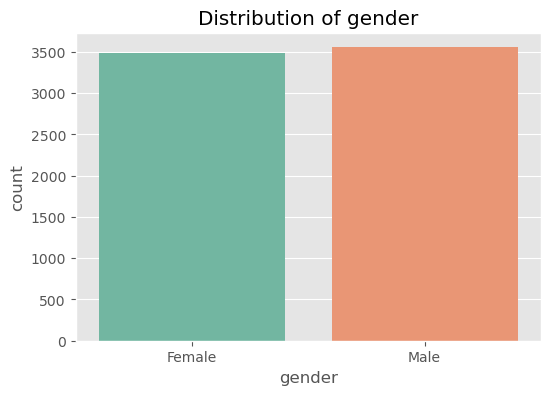

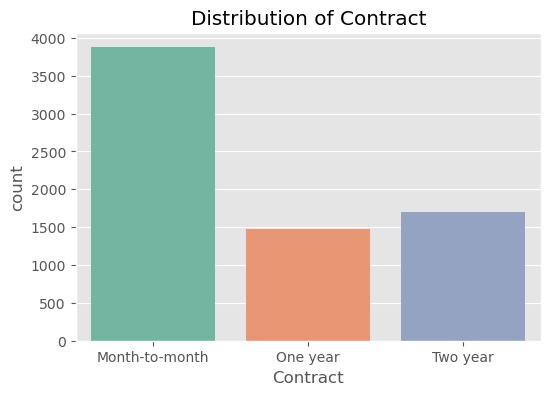

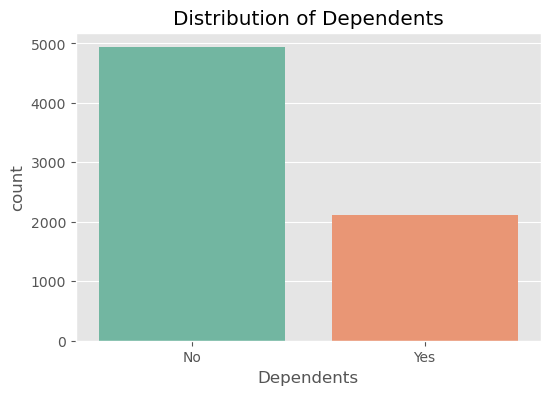

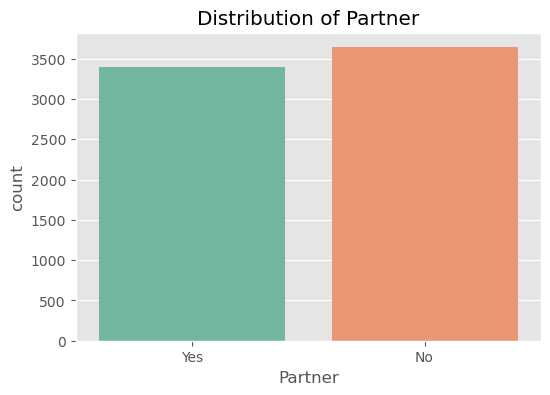

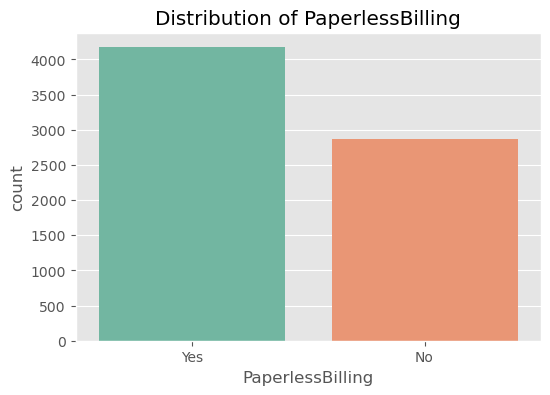

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.show()


Summary Statistics

In [87]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Summary statistics
display(df[numerical_features].describe())

# Additional metrics
for col in numerical_features:
    print(f"--- {col} ---")
    print("Range:", df[col].max() - df[col].min())
    print("Median:", df[col].median())
    print("Standard Deviation:", df[col].std())
    print("\n")


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


--- tenure ---
Range: 72
Median: 29.0
Standard Deviation: 24.55948102309423


--- MonthlyCharges ---
Range: 100.5
Median: 70.35
Standard Deviation: 30.09004709767854


--- TotalCharges ---
Range: 8666.0
Median: 1397.475
Standard Deviation: 2266.7713618831453




Histograms & Boxplots

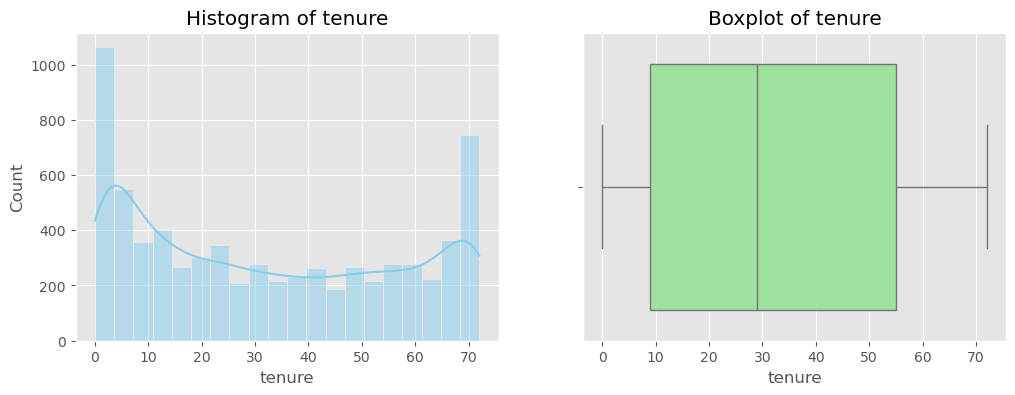

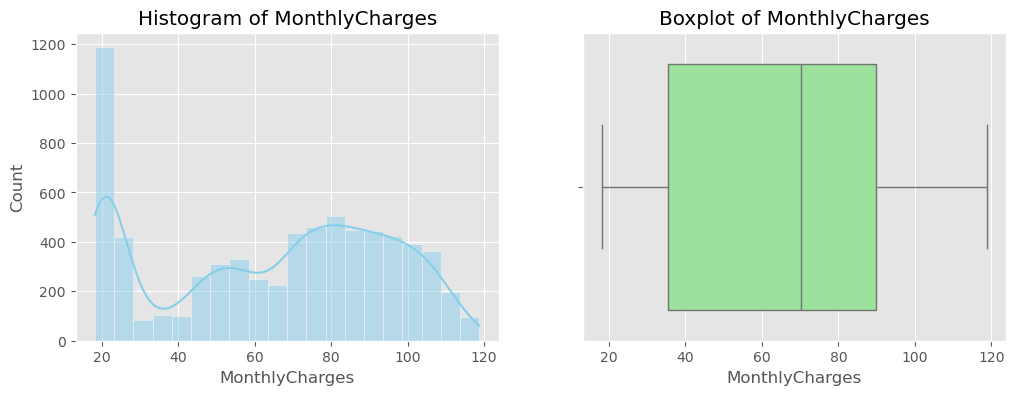

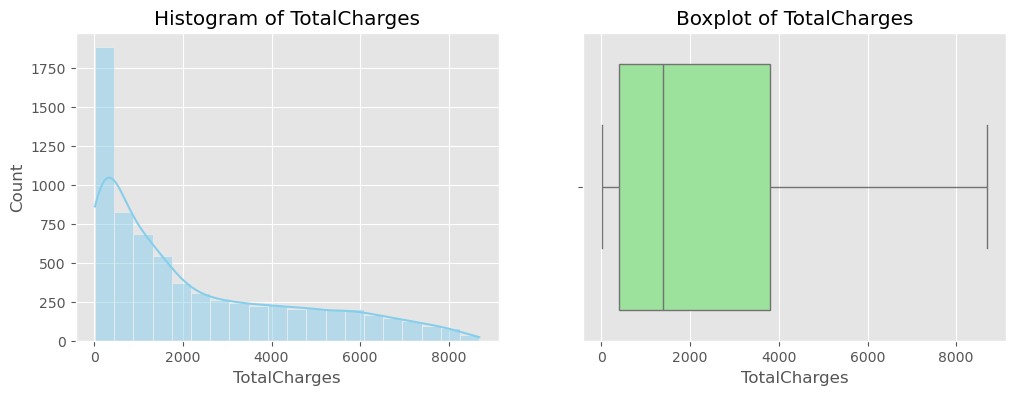

In [88]:
for col in numerical_features:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.show()


### Bivariate Analysis

In [89]:
categorical_features = ['gender', 'Contract', 'Dependents', 'Partner', 'PaperlessBilling']

for col in categorical_features:
    print(f"--- Churn by {col} ---")
    ctab = pd.crosstab(df[col], df['Churn'])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    display(ctab, ctab_percent)


--- Churn by gender ---


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


--- Churn by Contract ---


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


--- Churn by Dependents ---


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


--- Churn by Partner ---


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


--- Churn by PaperlessBilling ---


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


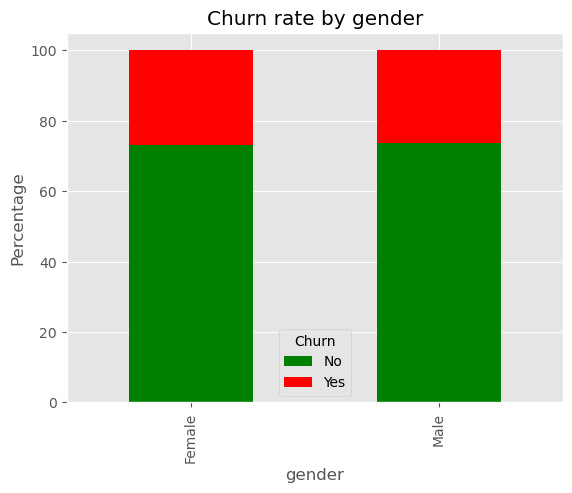

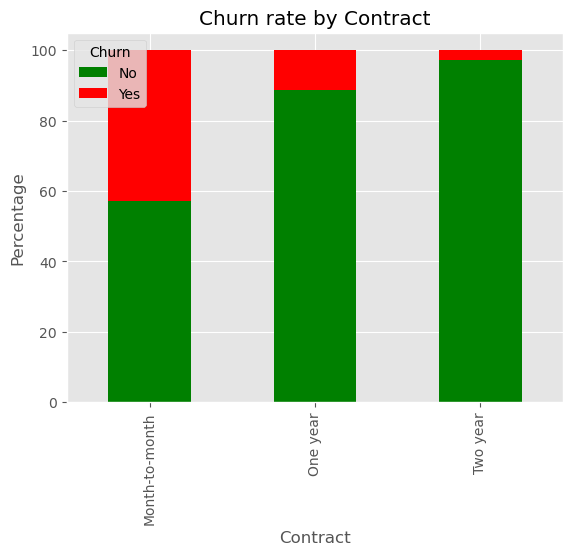

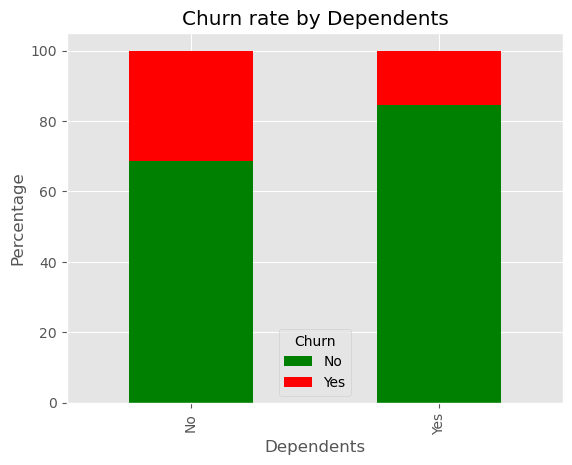

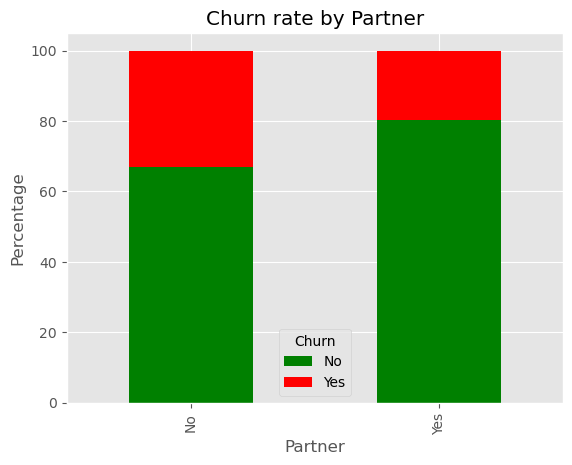

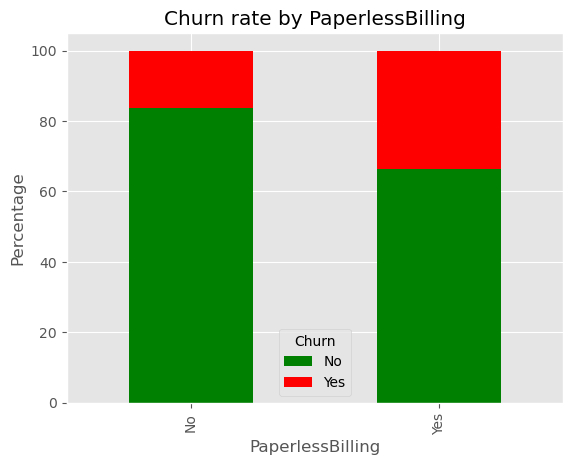

In [90]:
import matplotlib.pyplot as plt

color_map = {'Yes':'red', 'No':'green'}

for col in categorical_features:
    ctab = pd.crosstab(df[col], df['Churn'])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # Plot
    ctab_percent.plot(kind='bar', stacked=True, color=[color_map.get(c, 'skyblue') for c in ctab_percent.columns])
    plt.title(f"Churn rate by {col}")
    plt.ylabel("Percentage")
    plt.legend(title="Churn")
    plt.show()


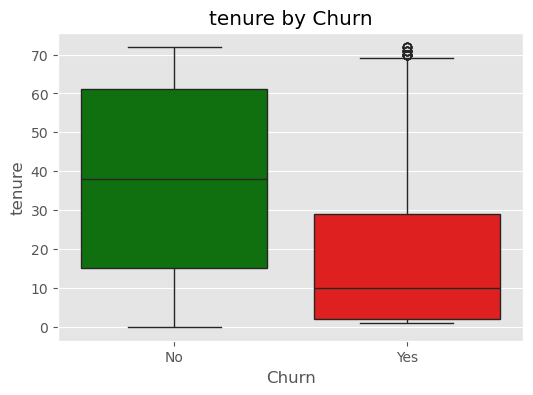

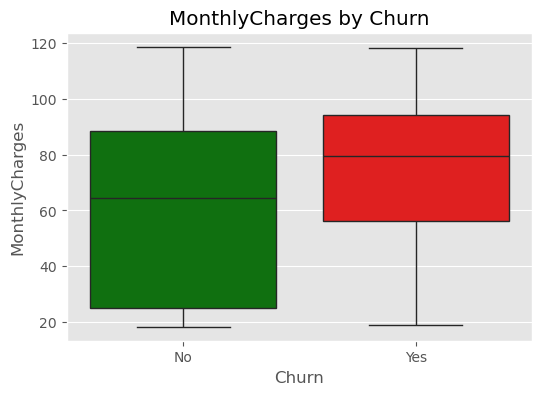

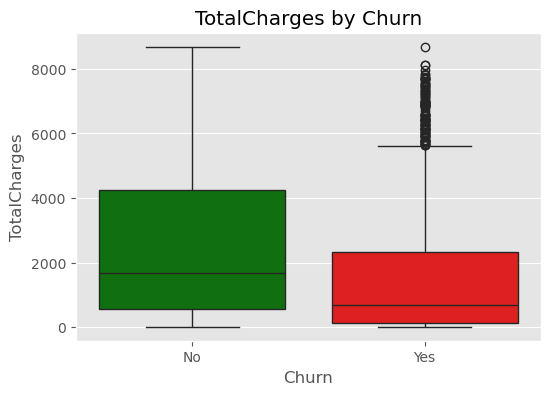

In [91]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df, palette=color_map)
    plt.title(f"{col} by Churn")
    plt.show()


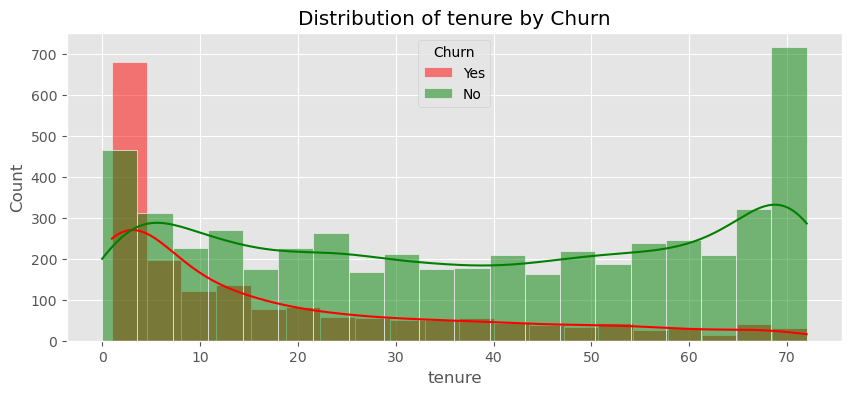

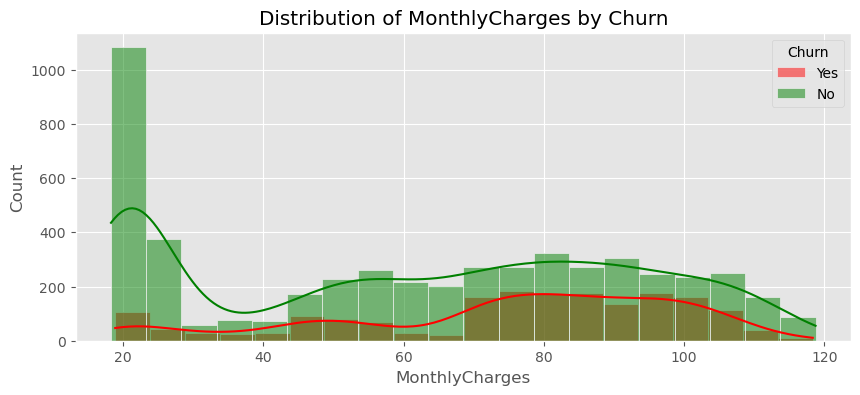

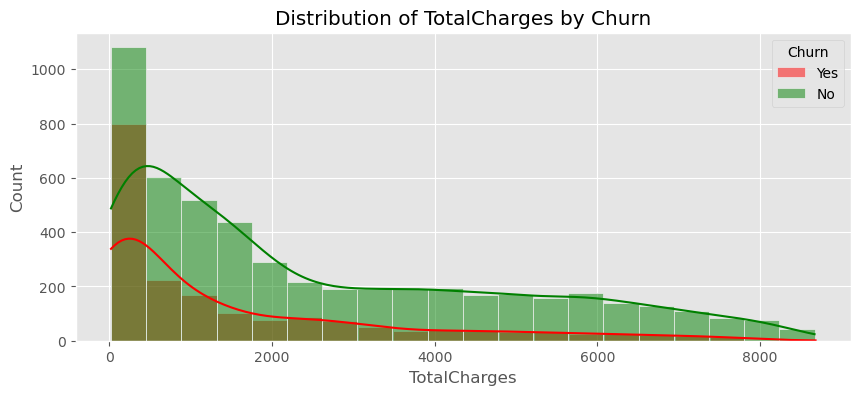

In [92]:
for col in numerical_features:
    plt.figure(figsize=(10,4))
    for label, color in color_map.items():
        subset = df[df['Churn']==label]
        sns.histplot(subset[col], color=color, label=label, kde=True, bins=20, alpha=0.5)
    plt.title(f"Distribution of {col} by Churn")
    plt.legend(title="Churn")
    plt.show()


### Multivariate Analysis

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


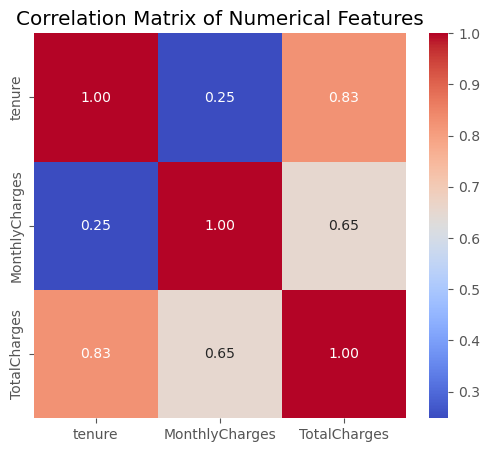

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()
display(corr_matrix)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


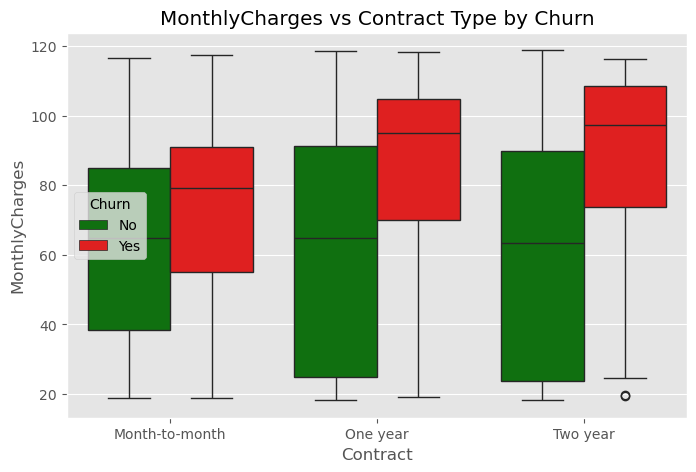

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette={'Yes':'red','No':'green'})
plt.title("MonthlyCharges vs Contract Type by Churn")
plt.show()


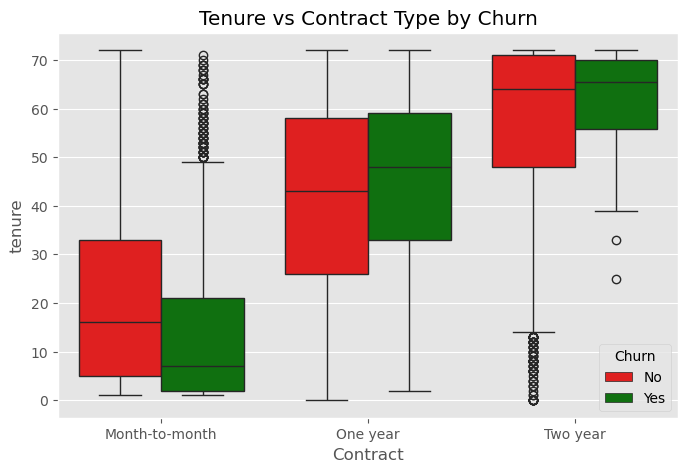

In [95]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=df, palette={'Yes':'green','No':'red'})
plt.title("Tenure vs Contract Type by Churn")
plt.show()


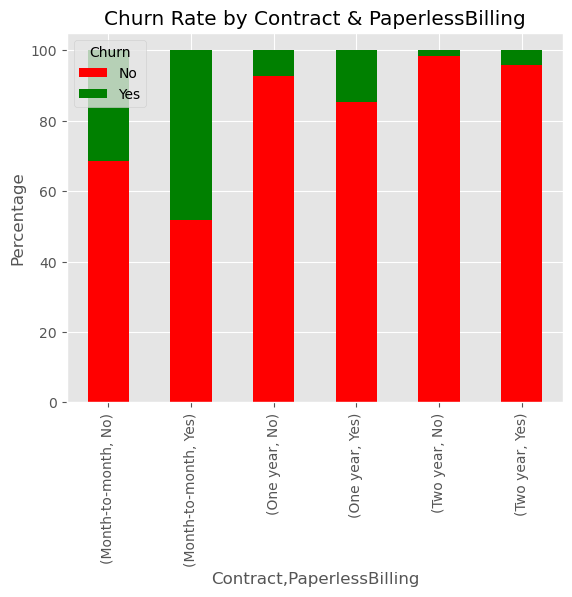

In [96]:
# Contract + PaperlessBilling effect on Churn
interaction = pd.crosstab([df['Contract'], df['PaperlessBilling']], df['Churn'])
interaction_percent = interaction.div(interaction.sum(axis=1), axis=0) * 100
interaction_percent.plot(kind='bar', stacked=True, color={'Yes':'green','No':'red'})
plt.title("Churn Rate by Contract & PaperlessBilling")
plt.ylabel("Percentage")
plt.show()
